## Exercise 2

For this exercise , you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you on D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. 


1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, and your final report.

4- Push your code and project to github and provide the link to your code here.



Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency
# import altair as alt

In [2]:
titanic = pd.read_csv("titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1. How many passengers survived the Titanic and what is the survival rate of them?

In [3]:
print((titanic["Survived"] == 1).sum(), "passengers survived the Titanic.")

342 passengers survived the Titanic.


In [4]:
print("The survival rate of the Titanic is", round((titanic["Survived"] == 1).mean() * 100, 2), "%.")

The survival rate of the Titanic is 38.38 %.


2. What is the average age of the passengers?

In [5]:
print("The average age of the passengers is", round(titanic["Age"].mean(), 2), "years old.")

The average age of the passengers is 29.7 years old.


3. Determine if the survival rate is associated to the class of passenger.

In [6]:
mean_class = titanic.groupby(by='Pclass').mean(numeric_only = True)
mean_class["Survived"]

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Text(0.5, 1.0, 'Mean Survival Rate of Passenger Class')

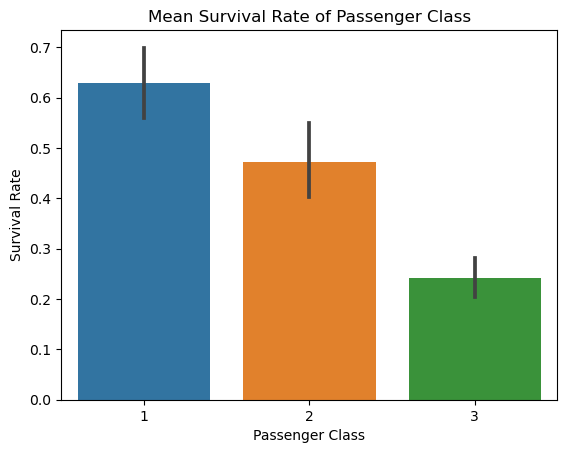

In [7]:
sns.barplot(x = "Pclass", y = "Survived", data = titanic)
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.title("Mean Survival Rate of Passenger Class")

In [8]:
pclass_table = pd.crosstab(titanic['Pclass'], titanic['Survived'])
chi2, p, dof, expected = chi2_contingency(pclass_table)
print(f"X2: {chi2}")
print(f"p-value: {p}")
print(f"DoF: {dof}")

X2: 102.88898875696056
p-value: 4.549251711298793e-23
DoF: 2


4. Determine if the survival rate is associated to gender.

In [9]:
mean_sex = titanic.groupby(by = "Sex").mean(numeric_only = True)
mean_sex["Survived"]

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Text(0.5, 1.0, 'Mean Survival Rate of Sex')

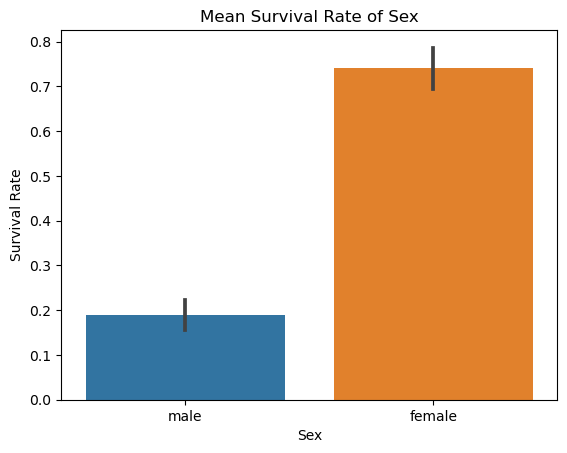

In [10]:
sns.barplot(x = "Sex", y = "Survived", data = titanic)
plt.xlabel("Sex")
plt.ylabel("Survival Rate")
plt.title("Mean Survival Rate of Sex")

In [11]:
sex_table = pd.crosstab(titanic['Sex'], titanic['Survived'])
chi2, p, dof, expected = chi2_contingency(sex_table)
print(f"X2: {chi2}")
print(f"p-value: {p}")
print(f"DoF: {dof}")

X2: 260.71702016732104
p-value: 1.1973570627755645e-58
DoF: 1


4. Determine the survival rate is associated with age.

In [12]:
titanic.loc[titanic['Age'] < 15, 'AgeGroup'] = 'children'
titanic.loc[(titanic['Age'] >= 15) & (titanic['Age'] < 25), 'AgeGroup'] = 'youth'
titanic.loc[(titanic['Age'] >= 25) & (titanic['Age'] < 65), 'AgeGroup'] = 'adults'
titanic.loc[titanic['Age'] >= 65, 'AgeGroup'] = 'seniors'

In [13]:
mean_age = titanic.groupby(by = "AgeGroup").mean(numeric_only = True)
mean_age["Survived"]

AgeGroup
adults      0.402353
children    0.576923
seniors     0.090909
youth       0.365000
Name: Survived, dtype: float64

Text(0.5, 1.0, 'Mean Survival Rate by Age')

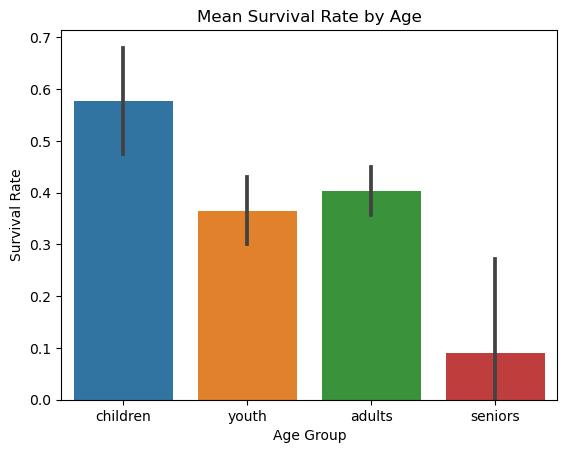

In [14]:
sns.barplot(x = "AgeGroup", y = "Survived", data = titanic, order=['children', 'youth', 'adults', 'seniors'])
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")
plt.title("Mean Survival Rate by Age")

In [15]:
age_table = pd.crosstab(titanic['AgeGroup'], titanic['Survived'])
chi2, p, dof, expected = chi2_contingency(age_table)
print(f"X2: {chi2}")
print(f"p-value: {p}")
print(f"DoF: {dof}")

X2: 15.392910641245544
p-value: 0.001509881051859829
DoF: 3
